<a href="https://colab.research.google.com/github/min-program/Deep_learning/blob/main/%EA%B0%9C%EA%B3%A0%EC%96%91%EC%9D%B4%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pylab as plt

In [3]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [4]:
drive_path = "/content/drive/MyDrive/"
source_filename = drive_path + "dataset/cat-and-dog.zip"

#저장할 경로
extract_folder = "dataset/"

#압축 해제
import shutil
shutil.unpack_archive(source_filename, extract_folder)

In [5]:
train_dir = extract_folder + "training_set/training_set"
valid_dir = extract_folder + "test_set/test_set"
print(train_dir)
print(valid_dir)

dataset/training_set/training_set
dataset/test_set/test_set


In [6]:
# 이미지 데이터 제너레이터 정의(Augmentation 미적용)
image_gen = ImageDataGenerator(rescale=(1/255.))
image_gen

In [7]:
train_gen = image_gen.flow_from_directory(train_dir,
                                          batch_size=32,
                                          target_size=(224,224),
                                          classes=['cats','dogs'],
                                          class_mode = 'binary',
                                          seed=2020)

valid_gen= image_gen.flow_from_directory(valid_dir,
                                          batch_size=32,
                                          target_size=(224,224),
                                          classes=['cats', 'dogs'],
                                          class_mode='binary',
                                          seed=2020)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


<ipython-input-8-95f5fcbc7c43>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.title(class_labels[labels[i].astype(np.int)])


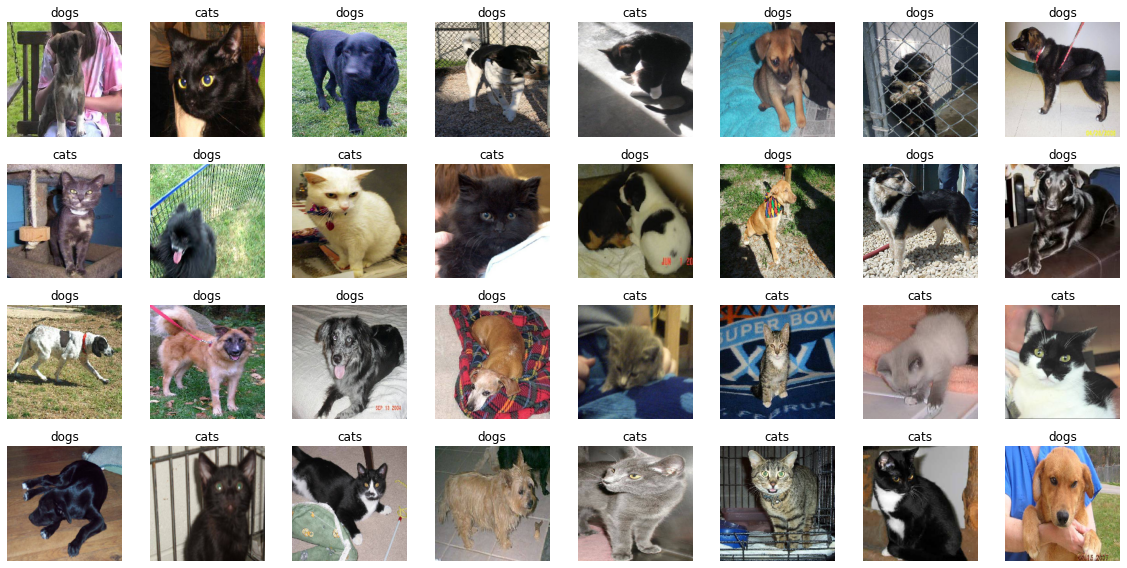

In [8]:
#샘플 이미지 출력
class_labels = ['cats', 'dogs']
batch = next(train_gen)
images, labels = batch[0], batch[1]

plt.figure(figsize=(16,8))
for i in range(32):

  ax = plt.subplot(4, 8, i +1)
  plt.imshow(images[i])
  plt.title(class_labels[labels[i].astype(np.int)])
  plt.axis("off")
plt.tight_layout()
plt.show()


<ipython-input-9-e31a1b5a0622>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.title(class_labels[labels[i].astype(np.int)])


<function matplotlib.pyplot.show(*args, **kw)>

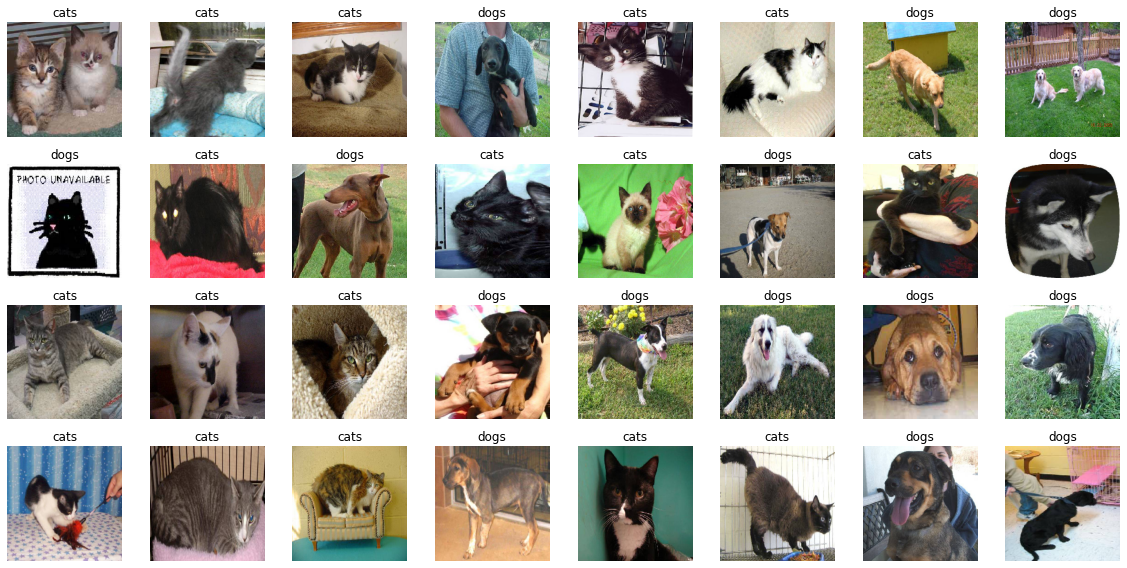

In [9]:
class_labels=['cats', 'dogs']
batch = next(train_gen)
images, labels= batch[0], batch[1]

plt.figure(figsize=(16,8))
for i in range(32):
    ax=plt.subplot(4, 8, i+1)
    plt.imshow(images[i])
    plt.title(class_labels[labels[i].astype(np.int)])
    plt.axis("off")
plt.tight_layout()
plt.show

In [10]:
# sequen api 샘플 모델생성

def build_model():
  with tf.device('/device:GPU:0'):
    
      model = tf.keras.Sequential([
          #convonution 층
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(32,(3,3), padding='same', activation='relu'),
      tf.keras.layers.MaxPooling2D((2,2)),

      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
      tf.keras.layers.MaxPooling2D((2,2)),

      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(128,(3,3), padding='same', activation='relu'),
      tf.keras.layers.MaxPooling2D((2,2)),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(1, activation='sigmoid'),
      ])

      return model
 
model = build_model()        

In [11]:
model.compile(optimizer=tf.optimizers.Adam(lr=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

histroy=model.fit(train_gen, validation_data=valid_gen, epochs=20)


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


251/251 [==============================] - 52s 194ms/step - loss: 2.1509 - accuracy: 0.5603 - val_loss: 0.6618 - val_accuracy: 0.6199
Epoch 2/20
251/251 [==============================] - 36s 143ms/step - loss: 0.6340 - accuracy: 0.6307 - val_loss: 0.5903 - val_accuracy: 0.6713
Epoch 3/20
251/251 [==============================] - 48s 192ms/step - loss: 0.6017 - accuracy: 0.6708 - val_loss: 0.5821 - val_accuracy: 0.6634
Epoch 4/20
251/251 [==============================] - 45s 180ms/step - loss: 0.5918 - accuracy: 0.6791 - val_loss: 0.5536 - val_accuracy: 0.7108
Epoch 5/20
251/251 [==============================] - 37s 148ms/step - loss: 0.5653 - accuracy: 0.7053 - val_loss: 0.5463 - val_accuracy: 0.7232
Epoch 6/20
251/251 [==============================] - 37s 147ms/step - loss: 0.5534 - accuracy: 0.7006 - val_loss: 0.5380 - val_accuracy: 0.7173
Epoch 7/20
251/251 [==============================] - 36s 142ms/step - loss: 0.5476 - accuracy: 0.7163 - val_loss: 0.5816 - val_accuracy: 0.6

In [12]:
def plot_loss_acc(history, epoch):
    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    
    fig, axes = plt.subplots(1,2,figsize=(12,4))
    
    axes[0].plot(range(1, epoch+1), loss, label = 'Training')
    axes[0].plot(range(1, epoch+1), val_loss, label = "Validation")
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch+1), acc, label = 'Training')
    axes[1].plot(range(1, epoch+1), val_acc, label = "Validation")
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

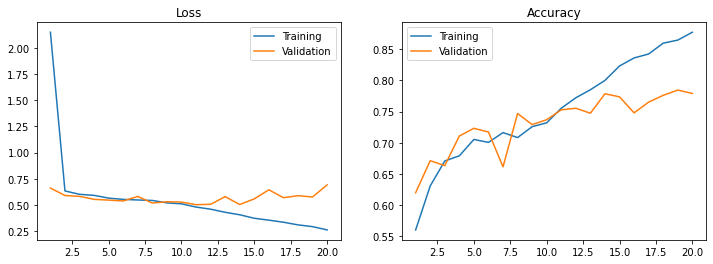

In [13]:
plot_loss_acc(histroy,20)

In [17]:
# 이미지 데이터 제너레이터 정의(Augmentation 적용)
image_gen_aug=ImageDataGenerator(rescale=1/255.,
                                 horizontal_flip=True,
                                 rotation_range=30,
                                 shear_range=0.15,
                                 zoom_range=0.3)
#flow_flom_directory 함수로 폴더에서 이미지 가져와서 제네레이터 객체로 정리
train_gen_aug = image_gen_aug.flow_from_directory(train_dir,
                                                  batch_size=32,
                                                  target_size=(224,224),
                                                  classes=['cats','dogs'],
                                                  class_mode = 'binary',
                                                  seed=2020)

valid_gen_aug=image_gen_aug.flow_from_directory(valid_dir,
                                                batch_size=32,
                                                target_size=(224,224),
                                                classes=['cats', 'dogs'],
                                                class_mode = 'binary',
                                                seed=2020)

#모델 생성
with tf.device('/device:GPU:0'):

    model_aug =build_model()

    model_aug.compile(optimizer=tf.optimizers.Adam(lr=0.001),
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    histroy_aug=model_aug.fit(train_gen_aug, validation_data=valid_gen_aug, epochs=40)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Epoch 1/40
251/251 [==============================] - 127s 502ms/step - loss: 1.8897 - accuracy: 0.5816 - val_loss: 0.6627 - val_accuracy: 0.6218
Epoch 2/40
251/251 [==============================] - 126s 502ms/step - loss: 0.6421 - accuracy: 0.6229 - val_loss: 0.6460 - val_accuracy: 0.6604
Epoch 3/40
251/251 [==============================] - 125s 497ms/step - loss: 0.6212 - accuracy: 0.6530 - val_loss: 0.6030 - val_accuracy: 0.6762
Epoch 4/40
251/251 [==============================] - 125s 498ms/step - loss: 0.6117 - accuracy: 0.6497 - val_loss: 0.6051 - val_accuracy: 0.6673
Epoch 5/40
251/251 [==============================] - 123s 490ms/step - loss: 0.6079 - accuracy: 0.6616 - val_loss: 0.5990 - val_accuracy: 0.6762
Epoch 6/40
251/251 [==============================] - 124s 492ms/step - loss: 0.6140 - accuracy: 0.6501 - val_loss: 0.5605 - val_accuracy: 0.6995
Epoch 7/40
251/251 [====================

KeyboardInterrupt: ignored